### ChIPseq Report 
#### Sofiya Patra
#### BF528


#### Correlation Plot

![titi](results/plot_with_numbers.png)

The above plot is a correlation between the samples in the ChIP-seq experiment, using the spearman correlation from deeptools. The pearson correlation measures linear correlation between two variables and assumes normally distributed data. The spearman correlation is based on rajnk correlation ad does not assume normality or linearity and is less driven by outliers. For this reason I chose spearman correlation. 

#### Consensus Set of Peaks 
To generate a consensus set of peaks for this ChIP-seq experiment, I used a simple intersection-based approach with bedtools. Specifically, I retained only those regions that were shared between the two peak sets from the two replicates.This is a conservative method as it captures only the shared regions but it effectively reduces noise and false positives. 

#### Filtering Peaks 

To filter the consensus peaks, the blacklist bed file created by the Boyle lab as part of the ENCODE project was used. A bedtools intersect was used with the -v flag and any peak that overlapped a blacklisted region by 1bp were removed. This method was chosed because blacklisted regions are often associated with technical artifacts and not biologically meaningful signals. This is a common strategy in peak-calling. 



#### Signal intensity plot

![titi](profile.png)



The above plot was generated using the computeMatrix utility in deepTools with the scale-regions mode, applying a 2000 bp padding upstream of the transcription start site (TSS) and downstream of the transcription end site (TES). The output matrix from computeMatrix was then visualized using plotProfile.
Separate matrices and plots were generated for both replicate datasets, with replicate 1 (rep1) shown above. The figure indicates a clear enrichment of signal near transcription start sites, with a noticeable dip around transcription end sites. This pattern is consistent with expected ChIP-seq profiles, particularly for transcription factors or chromatin marks that are enriched near gene promoters.

#### Motifs

![titi](refs/10motifs.png)

Enriched motifs in the filtered consensus ChIP-seq peaks were analyzed using the findMotifsGenome.pl utility in HOMER. The top 10 results of this analysis are shown above. The top 4 results are all RUNX proteins which suggests the protein pulled down in the IP for this experiment was likely a RUNX protein.  

### Week 4 
#### Methods 
Published FASTQ files for two Input and two IP (immunoprecipitation) replicates were downloaded and assessed for quality using FastQC (v0.11.9_cv8). Adapter sequences were trimmed using Trimmomatic, and the reads were aligned to the human genome using Bowtie2 (index built with bowtie2-build). Aligned reads were sorted and indexed using Samtools, and post-alignment quality control metrics were generated with samtools flagstat. Read coverage across the genome was computed using bamCoverage (from DeepTools), and sample correlations were assessed using multiBigwigSummary and plotCorrelation. Peak calling was performed with MACS3 (v3.0.3) using default parameters. Peaks from the two IP replicates were merged into a consensus peak set using bedtools intersect. To reduce false positives, peaks overlapping ENCODE blacklist regions (provided by the Boyle lab) were removed using bedtools. Peak annotation was performed with HOMER's annotatePeaks.pl, and motif enrichment analysis was conducted using HOMER's findMotifsGenome.pl. Signal visualization around peaks was generated with computeMatrix and plotProfile from DeepTools.

#### Quality Control Results
![titi](results/generalstats_qc.png)

The MultiQC results showed no major concerns with the quality of the sequencing experiment. One potential concern to note seen above is the significantly lower number of reads mapped in the replicate 2 input sample 10.1M compared to ~28M for all other samples. As it is the input and the quality of the reads still looks good, this is not a major concern. The high percentage of duplicates in the IP samples is expected for a ChIPseq experiment. Minor edge effects in sequence quality scores and the presence of adapter content were observed but are not expected to significantly impact downstream analyses. 


#### Figure Recreation

In [39]:
pip install matplotlib-venn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

In [41]:
rnaseq = pd.read_csv('refs/GSE75070_MCF7_shRUNX1_shNS_RNAseq_log2_foldchange.txt', sep='\t')

##### Upregulated Genes

In [42]:
rnaseq.query('padj < .01 & log2FoldChange > 1')

,genename,transcript,log2FoldChange,padj
48,SGOL1,"NM_001012409,NM_001012410,NM_001012411,NM_0010...",1.865109,7.048718e-16
50,MYCN,"NM_001293228,NM_001293231,NM_001293233",1.961676,9.265427e-05
66,INCENP,"NM_001040694,NM_020238",1.635607,3.296986e-14
80,VCAN,"NM_001126336,NM_001164097,NM_001164098,NM_004385",2.010163,1.561000e-06
86,TPI1,"NM_001159287,NM_001258026",1.052948,9.799512e-11
...,...,...,...,...
15256,PCDHAC2,"NM_018899,NM_031883",1.590426,1.305452e-07
15274,TCF19,"NM_001077511,NM_007109",1.684759,1.205806e-18
15282,NEK2,"NM_001204182,NM_001204183,NM_002497",1.349700,1.898691e-05
15335,SMAD9,"NM_001127217,NM_005905",1.333194,8.277110e-03


##### Downregulated Genes 

In [43]:
rnaseq.query('padj < .01 & log2FoldChange < -1')

,genename,transcript,log2FoldChange,padj
39,CYSRT1,NM_199001,-1.179227,6.910866e-04
139,AGAP9,"NM_001190810,NM_001190810_chr10:47191843_47213626",-1.179856,2.622705e-04
146,TM2D1,NM_032027,-1.120710,2.415048e-07
162,SEMA4C,NM_017789,-1.480403,4.369624e-13
206,CCDC78,NM_001031737,-1.080449,1.883375e-03
...,...,...,...,...
15330,UCKL1-AS1,NR_027287,-1.222779,2.415494e-04
15343,SCARNA12,NR_003010,-1.013360,2.225647e-08
15367,TM4SF1,NM_014220,-2.659629,1.184314e-13
15381,PAN2,"NM_001127460,NM_001166279,NM_014871",-1.394833,1.368096e-28


In [44]:
de_genes = rnaseq.query('padj < .01 & abs(log2FoldChange) > 1')['genename'].tolist()
pos_genes = rnaseq.query('padj < .01 & log2FoldChange > 1')['genename'].tolist()
neg_genes = rnaseq.query('padj < .01 & log2FoldChange < -1')['genename'].tolist()

In [45]:
peaks = pd.read_csv('results/annotated_peaks.txt', sep='\t')
peaks.head(10)

,PeakID (cmd=annotatePeaks.pl filtered_peaks.bed GRCh38.primary_assembly.genome.fa -gtf gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,rep1_peak_933,chr1,146228817,146229331,+,3013,NaN,promoter-TSS (ENST00000362074.8),protein_coding-promoter-TSS (ENST00000362074.8),-33.0,ENST00000687833.1,ENSG00000264343,ENST00000685177,NaN,NaN,NOTCH2NLA,NaN,NaN,protein_coding
1,rep1_peak_956,chr1,148679264,148680120,+,2856,NaN,promoter-TSS (ENST00000593495.4),protein_coding-promoter-TSS (ENST00000593495.4),50.0,ENST00000606877.2,ENSG00000270629,ENST00000621066,NaN,NaN,NBPF14,NaN,NaN,protein_coding
2,rep1_peak_967,chr1,149390247,149390764,+,2435,NaN,promoter-TSS (ENST00000621744.4),protein_coding-promoter-TSS (ENST00000621744.4),-116.0,ENST00000650865.2,ENSG00000286219,ENST00000652191,NaN,NaN,NOTCH2NLC,NaN,NaN,protein_coding
3,rep1_peak_740,chr1,120069178,120070015,+,2198,NaN,promoter-TSS (ENST00000256646.7),protein_coding-promoter-TSS (ENST00000256646.7),20.0,ENST00000652302.1,ENSG00000134250,ENST00000640021,NaN,NaN,NOTCH2,NaN,NaN,protein_coding
4,rep1_peak_3996,chr15,70462699,70463421,+,1900,NaN,Intergenic,Intergenic,42868.0,ENST00000559752.1,ENSG00000259473,ENST00000559752,NaN,NaN,LINC02205,NaN,NaN,lncRNA
5,rep1_peak_4302,chr16,11915871,11916319,+,1676,NaN,promoter-TSS (ENST00000420576.6),protein_coding-promoter-TSS (ENST00000420576.6),-13.0,ENST00000420576.6,ENSG00000103342,ENST00000434724,NaN,NaN,GSPT1,NaN,NaN,protein_coding
6,rep1_peak_749,chr1,120723572,120724141,+,1529,NaN,promoter-TSS (ENST00000620612.6),protein_coding-promoter-TSS (ENST00000620612.6),-56.0,ENST00000690847.1,ENSG00000286106,ENST00000624419,NaN,NaN,NOTCH2NLR,NaN,NaN,protein_coding
7,rep1_peak_3904,chr15,50354820,50355603,+,1459,NaN,promoter-TSS (ENST00000220429.12),protein_coding-promoter-TSS (ENST00000220429.12),6.0,ENST00000667317.3,ENSG00000244879,ENST00000558593,NaN,NaN,GABPB1-AS1,NaN,NaN,lncRNA
8,rep1_peak_6421,chr2,11498541,11498959,+,1457,NaN,"intron (ENST00000628795.2, intron 1 of 2)","protein_coding-intron (ENST00000628795.2, intr...",16409.0,ENST00000628795.2,ENSG00000196208,ENST00000628795,NaN,NaN,GREB1,NaN,NaN,protein_coding
9,rep1_peak_1233,chr1,205211237,205211902,+,1418,NaN,promoter-TSS (ENST00000367161.7),protein_coding-promoter-TSS (ENST00000367161.7),-3.0,ENST00000367161.7,ENSG00000133059,ENST00000367161,NaN,NaN,DSTYK,NaN,NaN,protein_coding


In [46]:
de_peaks = peaks.query('`Gene Name` in @de_genes')
pos_peaks = peaks.query('`Gene Name` in @pos_genes')
neg_peaks = peaks.query('`Gene Name` in @neg_genes')

In [47]:
peaks = pd.read_csv('results/annotated_peaks.txt', sep='\t')
peaks.head(10)

,PeakID (cmd=annotatePeaks.pl filtered_peaks.bed GRCh38.primary_assembly.genome.fa -gtf gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,rep1_peak_933,chr1,146228817,146229331,+,3013,NaN,promoter-TSS (ENST00000362074.8),protein_coding-promoter-TSS (ENST00000362074.8),-33.0,ENST00000687833.1,ENSG00000264343,ENST00000685177,NaN,NaN,NOTCH2NLA,NaN,NaN,protein_coding
1,rep1_peak_956,chr1,148679264,148680120,+,2856,NaN,promoter-TSS (ENST00000593495.4),protein_coding-promoter-TSS (ENST00000593495.4),50.0,ENST00000606877.2,ENSG00000270629,ENST00000621066,NaN,NaN,NBPF14,NaN,NaN,protein_coding
2,rep1_peak_967,chr1,149390247,149390764,+,2435,NaN,promoter-TSS (ENST00000621744.4),protein_coding-promoter-TSS (ENST00000621744.4),-116.0,ENST00000650865.2,ENSG00000286219,ENST00000652191,NaN,NaN,NOTCH2NLC,NaN,NaN,protein_coding
3,rep1_peak_740,chr1,120069178,120070015,+,2198,NaN,promoter-TSS (ENST00000256646.7),protein_coding-promoter-TSS (ENST00000256646.7),20.0,ENST00000652302.1,ENSG00000134250,ENST00000640021,NaN,NaN,NOTCH2,NaN,NaN,protein_coding
4,rep1_peak_3996,chr15,70462699,70463421,+,1900,NaN,Intergenic,Intergenic,42868.0,ENST00000559752.1,ENSG00000259473,ENST00000559752,NaN,NaN,LINC02205,NaN,NaN,lncRNA
5,rep1_peak_4302,chr16,11915871,11916319,+,1676,NaN,promoter-TSS (ENST00000420576.6),protein_coding-promoter-TSS (ENST00000420576.6),-13.0,ENST00000420576.6,ENSG00000103342,ENST00000434724,NaN,NaN,GSPT1,NaN,NaN,protein_coding
6,rep1_peak_749,chr1,120723572,120724141,+,1529,NaN,promoter-TSS (ENST00000620612.6),protein_coding-promoter-TSS (ENST00000620612.6),-56.0,ENST00000690847.1,ENSG00000286106,ENST00000624419,NaN,NaN,NOTCH2NLR,NaN,NaN,protein_coding
7,rep1_peak_3904,chr15,50354820,50355603,+,1459,NaN,promoter-TSS (ENST00000220429.12),protein_coding-promoter-TSS (ENST00000220429.12),6.0,ENST00000667317.3,ENSG00000244879,ENST00000558593,NaN,NaN,GABPB1-AS1,NaN,NaN,lncRNA
8,rep1_peak_6421,chr2,11498541,11498959,+,1457,NaN,"intron (ENST00000628795.2, intron 1 of 2)","protein_coding-intron (ENST00000628795.2, intr...",16409.0,ENST00000628795.2,ENSG00000196208,ENST00000628795,NaN,NaN,GREB1,NaN,NaN,protein_coding
9,rep1_peak_1233,chr1,205211237,205211902,+,1418,NaN,promoter-TSS (ENST00000367161.7),protein_coding-promoter-TSS (ENST00000367161.7),-3.0,ENST00000367161.7,ENSG00000133059,ENST00000367161,NaN,NaN,DSTYK,NaN,NaN,protein_coding


##### Figure 2F

In [48]:
de_peaks = peaks.query('`Gene Name` in @de_genes')
pos_peaks = peaks.query('`Gene Name` in @pos_genes')
neg_peaks = peaks.query('`Gene Name` in @neg_genes')

In [49]:
up_5kb = pos_peaks[(pos_peaks['Distance to TSS'] < 5000) & (pos_peaks['Distance to TSS'] > -5000)].shape[0]
down_5kb = neg_peaks[(neg_peaks['Distance to TSS'] < 5000) & (neg_peaks['Distance to TSS'] > -5000)].shape[0]

up_20kb = pos_peaks[(pos_peaks['Distance to TSS'] < 20000) & (pos_peaks['Distance to TSS'] > -20000)].shape[0]
down_20kb = neg_peaks[(neg_peaks['Distance to TSS'] < 20000) & (neg_peaks['Distance to TSS'] > -20000)].shape[0]


/scratch/340357.1.ood/ipykernel_228573/3172056600.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category, rotation=30, ha="right")


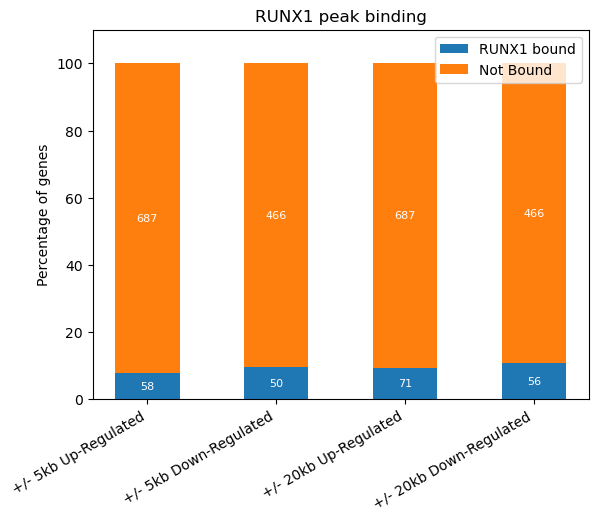

In [50]:
category = (
    "+/- 5kb Up-Regulated",
    "+/- 5kb Down-Regulated",
    "+/- 20kb Up-Regulated",
    "+/- 20kb Down-Regulated",
)
gene_counts = {
    "RUNX1 bound": np.array([up_5kb, down_5kb, up_20kb, down_20kb]),
    "Not Bound": np.array([len(pos_genes), len(neg_genes), len(pos_genes), len(neg_genes)])
}
width = 0.5

totals = sum(gene_counts.values())

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, gene_count in gene_counts.items():
    percent = gene_count / totals * 100
    p = ax.bar(category, percent, width, label=boolean, bottom=bottom)
    for i in range(len(category)):
        ax.text(
            i,                       # x position (bar center)
            bottom[i] + percent[i] / 2,  # y position (middle of bar)
            str(gene_count[i]),       # raw number
            ha="center", va="center", fontsize=8, color="white"
        )
    bottom += percent

ax.set_ylabel("Percentage of genes")
ax.set_title("RUNX1 peak binding")
ax.legend(loc="upper right")
plt.ylim(0, 110)  # extra space for readability
ax.set_xticklabels(category, rotation=30, ha="right")


plt.show()

##### Figure 2D, 2E
Generated using IGV
![titi](MALAT11.png)

![titi](NEAT1.png)

These peaks are statistically significant in both of these genes. The genomic tracks are similar in the distribution of the peaks/their locations around these genes but some of the peaks in the publication appear to be larger than the ones seen here. It is possible that the publication merged the peaks of the two replicates. Above, I am only plotting replicate 1.

##### Figure S2A


In [51]:
%%bash
cd results
echo -e "Sample\tRaw_Reads\tMapped_Reads\tMapping_Percentage" > summary_flagstat.tsv

for file in *_flagstat.txt; do
    sample_name=$(basename $file .flagstat.txt)
    raw_line=$(head -n 1 $file)
    raw_reads=$(echo $raw_line | awk '{print $1}')
    mapped_line=$(grep "mapped (" $file | head -n 1)
    mapped_reads=$(echo $mapped_line | awk '{print $1}')
    mapping_percentage=$(echo $mapped_line | awk -F '[()%]' '{print $2}')
    echo -e "${sample_name}\t${raw_reads}\t${mapped_reads}\t${mapping_percentage}" >> summary_flagstat.tsv
done

In [52]:
pd.read_csv('results/summary_flagstat.tsv', sep="\t")


,Sample,Raw_Reads,Mapped_Reads,Mapping_Percentage
0,INPUT_rep1_flagstat.txt,30075142,28253593,93.94
1,INPUT_rep2_flagstat.txt,10900442,10069440,92.38
2,IP_rep1_flagstat.txt,29734121,27969494,94.07
3,IP_rep2_flagstat.txt,29988988,28351783,94.54


Do you observe differences in the reported number of raw and mapped reads?

If so, provide at least two explanations for the discrepancies.


Comparing my results to the original publication, the number of raw reads is fully consistent across all samples. However, the number of mapped reads is consistently higher in my results compared to the publication. For example, in IP replicate 1, there are 29,734,121 raw reads, and 27,969,494 reads are mapped in my analysis, compared to 25,949,243 mapped reads reported in the paper.
There are several possible explanations for this discrepancy. First, the authors may have performed additional quality control (QC) filtering steps prior to alignment (e.g., removing low-quality reads or adapter contamination), resulting in fewer reads available for mapping. Second, although both analyses used Bowtie2 for alignment, differences in software versions, default parameters, or specific alignment settings (e.g., mismatch tolerance, seed length) could lead to differences in mapping rates.

##### Figure 2SB

Do you observe any differences in your calculated metrics?

What was the author’s takeaway from this figure? What is your conclusion from this figure regarding the success of the experiment?


Figure 2SB is a correlation plot showing the Pearson correlation of the signal between the IP and Input samples. In my correlation plot above, I used the spearman correlation instead. Both plots show a Input samples and IP samples clustering together which makes sense. The authors concluded from this figure that the replicates showed good reproducibility, and that there was a clear distinction between IP and Input samples. Based on my plot, I would reach the same conclusion: the experiment was successful, with strong intra-group similarity and good separation between IP and Input.

In [53]:
%%bash
echo "Number of peaks for each replicate:"
wc -l results/rep1_peaks.narrowPeak
wc -l results/rep2_peaks.narrowPeak
echo "Number unfiltered reproducible peaks:"
wc -l results/intersect.bed
echo "Number of filtered reproducible peaks:"
wc -l results/filtered_peaks.bed

Number of peaks for each replicate:
13161 results/rep1_peaks.narrowPeak
17440 results/rep2_peaks.narrowPeak
Number unfiltered reproducible peaks:
4741 results/intersect.bed
Number of filtered reproducible peaks:
4169 results/filtered_peaks.bed


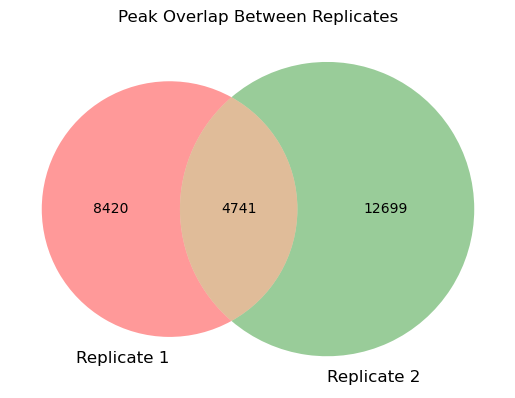

In [54]:
# Manually enter your numbers from wc -l
rep1_total = 13161   # replace with your wc -l count for rep1
rep2_total = 17440   # replace with your wc -l count for rep2
intersect_total = 4741# replace with your wc -l count for intersect

# Calculate unique parts
rep1_only = rep1_total - intersect_total
rep2_only = rep2_total - intersect_total

# Plot
venn2(subsets = (rep1_only, rep2_only, intersect_total), 
      set_labels = ('Replicate 1', 'Replicate 2'))

plt.title("Peak Overlap Between Replicates")
plt.show()

Do you observe any differences in your results compared to what you see?

If so, provide at least two explanations for the discrepancies in the number of called peaks.

Comparing the results above with those in the publication, the numbers are generally similar, though my analysis identified a greater number of peaks in both replicates as well as more reproducible peaks between the two replicates. Specifically, replicate 2 had 10,465 peaks reported in the publication, compared to 12,699 peaks identified here, while replicate 1 had 3,983 peaks reported versus 8,420 peaks identified in this analysis. Several factors could explain these discrepancies. The authors of the original publication may have applied more stringent quality control filtering, resulting in fewer peaks retained. Additionally, as observed earlier, my analysis produced a higher number of mapped reads overall, which could naturally lead to more peaks being called. Finally, the original authors used HOMER for peak calling, while this analysis employed MACS3, and differences between peak-calling algorithms can also contribute to differences in the number and characteristics of identified peaks.

##### Enrichment Analysis

In [60]:
promoters = peaks[peaks['Annotation'].str.contains('promoter-TSS', na=False)]['Gene Name'].tolist()

with open('results/promoters.txt', 'w') as w:
    w.write('\n'.join(promoters))

all_peaks = pd.read_csv('results/david_results_allpeaks.txt', sep='\t')
deg_overlap = pd.read_csv('results/DE_david_results.txt', sep='\t')

top_all_peaks = all_peaks.head(10)
top_deg_overlap = deg_overlap.head(10)


In [58]:
top_all_peaks

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,GOTERM_CC_DIRECT,GO:0005654~nucleoplasm,498,30.236794,3.189831e-46,"MDC1, SCOC, NOC2L, PTPDC1, PSMD6, PSMD7, CSPP1...",1406,4107,20795,1.793404,2.807051e-43,2.807051e-43,2.685838e-43
1,UP_KW_PTM,KW-0597~Phosphoprotein,878,53.309047,8.353912e-41,"MDC1, JRK, NOC2L, PTPDC1, PREX1, FOXO3B, SAP30...",1141,8435,14316,1.306007,2.088478e-39,2.172017e-39,1.921400e-39
2,GOTERM_MF_DIRECT,GO:0005515~protein binding,1187,72.070431,5.810939e-34,"MDC1, JRK, SCOC, GHITM, TMEM97, NOC2L, TMEM91,...",1406,13690,19253,1.187300,8.402618e-31,8.402618e-31,8.361941e-31
3,GOTERM_CC_DIRECT,GO:0005634~nucleus,615,37.340619,9.844203e-30,"MDC1, JRK, GABPB2, RRP1, H2AC19, NOC2L, RPL6, ...",1406,6244,20795,1.456753,8.662899e-27,4.331449e-27,4.144409e-27
4,GOTERM_CC_DIRECT,GO:0005829~cytosol,571,34.669095,1.448463e-28,"SCOC, RPL31, NOC2L, PTPDC1, RPL6, PREX1, LACTB...",1406,5713,20795,1.478242,1.274648e-25,4.248826e-26,4.065354e-26
5,UP_KW_PTM,KW-0007~Acetylation,438,26.593807,1.659726e-27,"TRIR, MDC1, RPL31, H2AC19, RPL6, H2AC18, LACTB...",1141,3515,14316,1.563453,4.149314e-26,2.157643e-26,1.908685e-26
6,UP_KW_CELLULAR_COMPONENT,KW-0539~Nucleus,604,36.672738,4.417882e-27,"MDC1, JRK, GABPB2, RRP1, H2AC19, TMEM97, NOC2L...",1297,5917,18049,1.420524,2.474014e-25,2.474014e-25,2.253120e-25
7,UP_SEQ_FEATURE,CROSSLNK:Glycyl lysine isopeptide (Lys-Gly) (i...,190,11.536126,7.557471e-25,"ZNF451, MDC1, CCNT2, ZMYND8, JMJD1C, CAAP1, RP...",1425,1277,20675,2.158705,4.627439e-21,4.627439e-21,4.614592e-21
8,UP_KW_PTM,KW-1017~Isopeptide bond,261,15.846995,1.360645e-20,"MDC1, ZMYND8, H2AC19, JMJD1C, RPL6, H2AC18, RP...",1141,1900,14316,1.723546,3.401613e-19,1.179226e-19,1.043161e-19
9,UP_KW_PTM,KW-0832~Ubl conjugation,343,20.825744,7.715051e-20,"MDC1, ZMYND8, H2AC19, JMJD1C, RPL6, H2AC18, EP...",1141,2773,14316,1.551959,1.928763e-18,5.014783e-19,4.436154e-19


In [59]:
top_deg_overlap

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,UP_KW_PTM,KW-0597~Phosphoprotein,51,69.863014,0.000002,"CREBZF, USPL1, MCM7, HSPB8, FMN1, KIF11, LMNB1...",58,8435,14316,1.492378,0.000024,0.000026,0.000022
1,GOTERM_CC_DIRECT,GO:0005634~nucleus,40,54.794521,0.000003,"CREBZF, MCM7, HSPB8, FMN1, KIF11, LMNB1, PIDD1...",69,6244,20795,1.930665,0.000426,0.000426,0.000426
2,UP_KW_PTM,KW-0007~Acetylation,30,41.095890,0.000016,"MCM7, KIF11, LMNB1, PIDD1, FAM156A, BRIP1, LGA...",58,3515,14316,2.106637,0.000189,0.000103,0.000087
3,UP_KW_CELLULAR_COMPONENT,KW-0539~Nucleus,34,46.575342,0.000205,"CREBZF, USPL1, MCM7, HSPB8, FMN1, LMNB1, PIDD1...",60,5917,18049,1.728539,0.005528,0.005543,0.005338
4,GOTERM_BP_DIRECT,GO:0051301~cell division,8,10.958904,0.000349,"CCNA2, HELLS, PTTG1, KIFC1, PLK1, NUF2, LIG4, ...",66,397,19478,5.947027,0.151273,0.163989,0.163989
5,UP_KW_BIOLOGICAL_PROCESS,KW-0498~Mitosis,7,9.589041,0.000722,"CCNA2, HELLS, PTTG1, KIFC1, PLK1, NUF2, KIF11",44,294,11523,6.235390,0.029172,0.011652,0.011368
6,UP_KW_BIOLOGICAL_PROCESS,KW-0131~Cell cycle,10,13.698630,0.000842,"CCNA2, HELLS, PTTG1, MCM7, KIFC1, PLK1, NUF2, ...",44,690,11523,3.795455,0.033935,0.011652,0.011368
7,UP_KW_BIOLOGICAL_PROCESS,KW-0132~Cell division,8,10.958904,0.000853,"CCNA2, HELLS, PTTG1, KIFC1, PLK1, NUF2, LIG4, ...",44,421,11523,4.976463,0.034366,0.011652,0.011368
8,GOTERM_MF_DIRECT,GO:0017116~single-stranded DNA helicase activity,3,4.109589,0.002241,"RFC3, MCM7, RFC2",69,20,19253,41.854348,0.378552,0.260364,0.259136
9,GOTERM_BP_DIRECT,GO:0006302~double-strand break repair,4,5.479452,0.002603,"BRIP1, PLK1, LIG4, ESCO2",66,82,19478,14.396157,0.706246,0.611709,0.611709


I filtered the peaks to include only those with promoter-TSS annotation. I then used the list generated above to query DAVID, and obtained the results above. 
 To look at the functional enrichment of the genes that overlapped with differentially expressed genes I queried a second set of genes in DAVID. These results are above. 

The enrichment analysis of all promoter-associated peaks showed strong enrichment for DNA repair and ribosomal processes. This suggests that RUNX1 may be playing a role in regulating genes involved in maintaining genome stability and protein synthesis. When restricting the analysis to genes that overlapped with differentially expressed genes (DEGs), a similar pattern emerged — enrichment for processes like cell division, DNA replication, and the nucleus.  This is consistent with the known biological functions of RUNX1, which has been implicated in chromatin organization and gene regulation in previous studies. The strong enrichment of nuclear and replication-related genes provides further evidence supporting RUNX1’s involvement in key regulatory pathways within the cell.